In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
data = {'Sales': [150,154,150,130,150,200,220,250,230,210,180,160,140,110,130,150,190,210,240,260,250,230,200,180,160,130,140,160,190,210,240,270,250,230,200,190],
        'months' : pd.date_range(start = '2019-01-01',periods = 36 , freq = 'M'),
        'Advertizing': [50,60,70,80,90,100,110,20,130,140,150,160,60,70,80,90,100,110,120,130,140,150,160,70,80,90,100,110,120,130,140,150,160,70,120,90]}


In [21]:
len(data['months'])

36

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


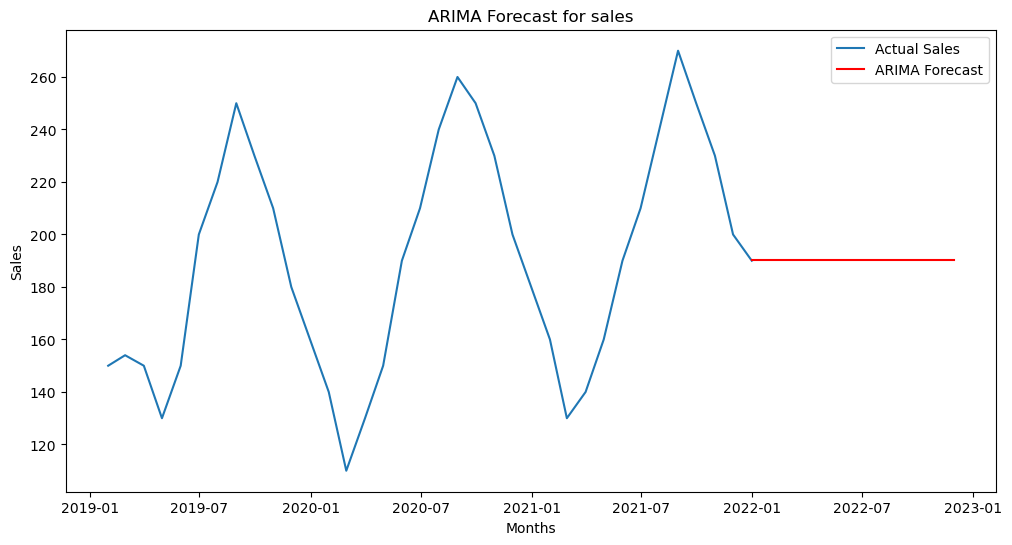

In [25]:
df = pd.DataFrame(data)
df.set_index('months',inplace=True)

order = (2,1,1) # p,d,q
model = ARIMA(df['Sales'])
results  = model.fit()

forcast_steps = 12
forcast = results.forecast(steps = forcast_steps)

plt.figure(figsize=(12,6))
plt.plot(df['Sales'],label = 'Actual Sales')
plt.plot(pd.date_range(start=df.index[-1], periods=forcast_steps , freq='M'),forcast,label = 'ARIMA Forecast' , color = 'red')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('ARIMA Forecast for sales')
plt.legend()
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15563D+00    |proj g|=  3.12910D+00

At iterate    5    f=  3.31077D+00    |proj g|=  1.53244D+00



At iterate   10    f=  2.56256D+00    |proj g|=  1.79606D-01

At iterate   15    f=  2.54775D+00    |proj g|=  3.56615D-02

At iterate   20    f=  2.53679D+00    |proj g|=  4.24890D-02

At iterate   25    f=  2.53669D+00    |proj g|=  3.36864D-04

At iterate   30    f=  2.53656D+00    |proj g|=  3.57935D-03

At iterate   35    f=  2.53646D+00    |proj g|=  9.66061D-04

At iterate   40    f=  2.53644D+00    |proj g|=  7.84164D-04

At iterate   45    f=  2.53643D+00    |proj g|=  3.44057D-04


/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.53643D+00    |proj g|=  2.95591D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   2.956D-04   2.536D+00
  F =   2.5364298513924446     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


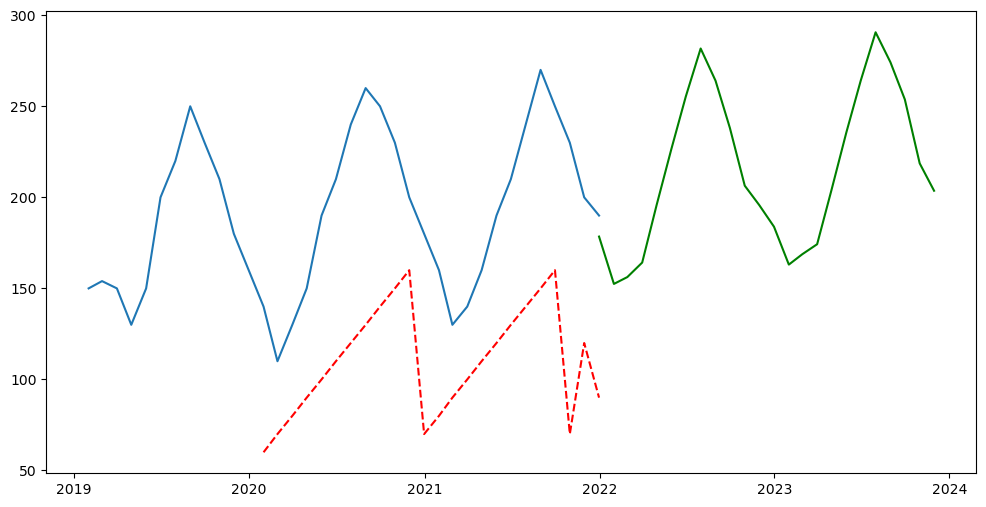

In [31]:
order = (2,1,1) # p,d,r
seasonal_order = (1,1,1,12) # P,Q,D,S
exog = df['Advertizing']
model = SARIMAX(df['Sales'],exog=exog,order=order,seasonal_order=seasonal_order)
results = model.fit()

forcast_steps = 24
forecast = results.get_forecast(steps = forcast_steps , exog = df.iloc[-forcast_steps:]['Advertizing'])

plt.figure(figsize=(12,6))
plt.plot(df['Sales'],label = 'Actual Sales')
plt.plot(pd.date_range(start = df.index[-1],periods = forcast_steps , freq = 'M'),forecast.predicted_mean , label = "SARIMAX",color = 'Green')
plt.plot(df.index[-forcast_steps:],df['Advertizing'][-forcast_steps:],linestyle = "--",color = 'red')

plt.show()
